<a href="https://colab.research.google.com/github/bellepoque7/2023-data-science-edu/blob/main/06-02%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%8B%A4%EC%8A%B5/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D%EA%B3%B5%EC%A0%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%A0%9C%ED%92%88%EC%9D%B4%EC%83%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공정데이터를 활용한 제품이상 데이터 분석
---

## 프로젝트 목표
---

- 데이터 분석 및 모델링 개발 프로세스를 예제 데이터 통해 경험

- Multi-stage continuous-flow manufacturing process dataset 데이터 분석을 통하여 공정 설비 센싱데이터값을 분석

## 프로젝트 목차
---

1. **데이터 읽기:** 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악

## 데이터 출처
---

- Multi-stage continuous-flow manufacturing process dataset (Real process data to predict factory output)

- https://www.kaggle.com/supergus/multistage-continuousflow-manufacturing-process

## 프로젝트 개요
---

- 실제 현업에서는 FDC, EES 등의 다양한 모듈을 통해 설비 데이터를 수집, 분석해 Lot의 공정 History 및 각 공정 step 별 계측 데이터를 사용해 대규모의 분석 및 모델링을 진행하지만, 보안상 사용이 어려워 간소화된 공개 데이터로 실습

- 해당 실습 프로젝트를 통해 데이터 분석 및 모델링 개발 프로세스를 경험하고 이를 현업에 적용

## 1. 데이터 읽기
---
**os**와 **pandas** 라이브러리를 사용하여 데이터를 불러옵니다

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import os

# 소수점 출력 제한
pd.options.display.float_format = '{: .4f}'.format

In [ ]:
# csv_files = os.listdir("/content/drive/MyDrive/Colab Notebooks/03. Python Library/Pandas/프로젝트/[프로젝트3] 공정데이터를 활용한 제품이상 데이터 분석")

# print(csv_files)
# # 코드

['[프로젝트]공정데이터를 활용한 제품이상 데이터 분석(실습).ipynb', '[프로젝트]공정데이터를 활용한 제품이상 데이터 분석(정답).ipynb', 'data']
데이터 개수 : 3


In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/03. Python Library/Pandas/프로젝트/[프로젝트3] 공정데이터를 활용한 제품이상 데이터 분석/data"
# # 코드
# print(march_sales)

/content/drive/MyDrive/Colab Notebooks/03. Python Library/Pandas/프로젝트/[프로젝트3] 공정데이터를 활용한 제품이상 데이터 분석/data/uci-secom.csv


In [8]:
# 코드
df = pd.read_csv('./uci-secom.csv.csv의 사본')
df.head()
# print(type(df))

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.9300,2564.0000,2187.7333,1411.1265,1.3602,100.0000,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.7800,2465.1400,2230.4222,1463.6606,0.8294,100.0000,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.6100,2559.9400,2186.4111,1698.0172,1.5102,100.0000,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.7200,2479.9000,2199.0333,909.7926,1.3204,100.0000,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.2400,2502.8700,2233.3667,1326.5200,1.5334,100.0000,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## 2. 데이터 정제
---
#### 데이터 확인하기
데이터가 어떻게 구성되어 있는지 **shape(), info()** 를 통해서 간단히 알아보곘습니다

In [9]:
# 코드
df.shape

(1567, 592)

In [11]:
# 코드
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


데이터 규모가 큰 관계로 출력되지 않고 간단한 정보를 알려줬습니다

출력된 정보를 보면 다음과 같은 내용을 확인할 수 있습니다
- 실수 자료형은 590개가 있다 -> 센서의 개수가 590개이므로 해당 데이터는 센서데이터로 예싱할 수 있다
- 정수 자료형이 1개가 있다
- object 자료형이 1개가 있다

두 데이터에 대해 알아보겠습니다

In [ ]:
df['0'].dtype

dtype('float64')

In [ ]:
columns = df.columns.tolist()

for column in columns :
# 코드
# 코드
# 코드
# 코드

object type column : Time
int type column : Pass/Fail


Time 컬럼은 object 자료형 컬럼이었고 Pass/Fail 컬럼은 정수 자료형이었습니다 

하지만 Time은 object가 아닌 시간 자료형이므로 시간에 따른 자료형으로 변경하겠습니다

#### 자료형 변경하기
Time 컬럼은 pandas의 **to_datetime()** 을 이용하여 시간데이터로 변환하겠습니다

In [ ]:
# 코드
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


#### 결측치 제거하기
공백값(결측치)은 데이터 분석을 방해하고 결과를 왜곡할 수 있습니다. 이를 위해서는 해당 값을 제거하거나 임의의 값으로 채우는 방법이 사용됩니다. 

그 전에 **isnull()** 과 **sum()** 을 사용하여 어느 컬럼에 데이터가 비어있는지 확인해보겠습니다

이번에는 데이터의 규모가 큰 관계로 missing이라는 변수에 저장하여 확인하고 처리하는 과정을 진행하겠습니다

In [ ]:
missings = # 코드

print ("결측값 개수가 0개 이상인 column과 개수")
print (# 코드)

print ("결측값 개수가 100개 이상인 column과 개수")
print (# 코드])

결측값 개수가 0개 이상인 column과 개수
0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64
결측값 개수가 100개 이상인 column과 개수
72      794
73      794
85     1341
109    1018
110    1018
111    1018
112     715
157    1429
158    1429
220    1341
244    1018
245    1018
246    1018
247     715
292    1429
293    1429
345     794
346     794
358    1341
382    1018
383    1018
384    1018
385     715
492    1341
516    1018
517    1018
518    1018
519     715
546     260
547     260
548     260
549     260
550     260
551     260
552     260
553     260
554     260
555     260
556     260
557     260
562     273
563     273
564     273
565     273
566     273
567     273
568     273
569     273
578     949
579     949
580     949
581     949
dtype: int64


어떤 데이터는 900개 이상인 반면, 10개이하의 결측값을 가진 것을 확인할 수 있습니다

**dropna()의 thresh 옵션** 을 사용하여 결측값이 몇 개 미만일 때, dropna() 가 사용될 수 있도록 하겠습니다

- 참고 : thresh는 결측값이 아닌 값이 몇 개 미만일 경우에만 적용시키는 인수(thresh값이 3이라면 결측값이 아닌 값이 3개 미만일 경우에만 dropna 실행)

In [ ]:
perc = 50
min_count = (perc / 100) * df.shape[0]
# 코드

df.shape

(1567, 564)

결측치를 채운 결과 592개의 열이 564개로 줄어든 것을 확인할 수 있습니다 

나머지 결측치는 평균으로 대체하여 데이터 분석을 진행하겠습니다

In [ ]:
df = # 코드   # df에 평균 적용시 numeric_only=True 옵션 적용
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 564, dtype: int64

#### Pass/Fail 변환하기
컬럼명은 Pass/Fail 인 것에 비해 컬럼 내 데이터는 1과 -1로 구분되어 있습니다 데이터 분석에는 큰 영향을 미치는 것은 아니지만 한 눈에 알아볼 수 있도록 해당 데이터를 컬럼명에 맞춰 Pass와 Fail로 변환하겠습니다

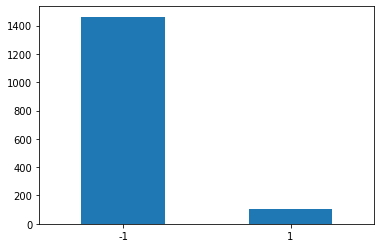

In [ ]:
# 코드 # rot은 rotation의 의미

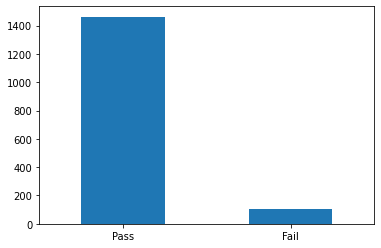

In [ ]:
# 코드
# 코드

## 3. 데이터 시각화
---
데이터 정제 과정이 끝났다면 데이터 시각화를 통해 데이터 분석을 진행하겠습니다

데이터 시각화를 위한 라이브러리 **matplotlib** 과 **seaborn** 을 불러오겠습니다

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 시간에 따른 Pass/Fail 분포 확인하기
Time 컬럼 데이터를 이용하여 월에 따른 Pass/Fail 분포를 확인하겠습니다 

그 전에 Time 데이터를 분할하여 기존 데이터프레임에 추가하겠습니다

In [ ]:
# 연, 월, 날, 시, 분으로 새로운 데이터 프레임 추가
def split_ordered_date(dataframe) :
    dataframe["Year"] = # 코드
    dataframe["Month"] = # 코드
    dataframe["Day"] = # 코드
    dataframe["Hour"] = # 코드
    dataframe["Minute"] = # 코드
    
    return dataframe

In [ ]:
df = split_ordered_date(df)

for unit in ['Year', 'Month', 'Day', 'Hour', 'Minute'] :
    # 코드
    # 코드
    print()

df.drop('Year', axis=1, inplace=True)

[Year]
[2008]

[Month]
[ 7  1  2  3  4  5  6  8  9 10 11 12]

[Day]
[19 20 21 22 23 25 27 28 29 30 31  8 13 15 16 17 18 24  9 14 26 10]

[Hour]
[11 12 13 14 15 17 19 20 21 22  3  8  0  2  5  4  9 16 23  6 18  7 10  1]

[Minute]
[55 32 17 43 22 53 44 45 24 35 57 52 21  3 59 41 47  0 30 15 23 18 37 10
 46  6 49 28 14 31 48 36 11  8 16 19  5  7  2 29 20 26 39  9 25 27 58  4
 51 33 12 54 50 38 40 56 34 13 42  1]



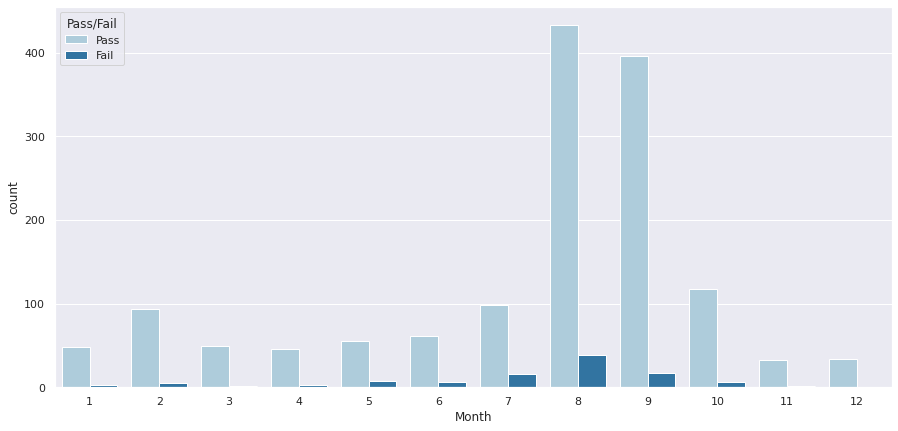

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid", palette="Paired")

# 코드

1월부터 12월까지 Pass/Fail 분포는 8월에 Fail이 증가하는 경향이 있지만 그만큼 Pass도 비약적으로 증가하고 있습니다 공정해야하는 제품 수량이 늘어남에 따라 눈에 띄는 요인이다라고 하기에는 어려움이 있습니다

이번에는 다른 시간 단위에 따른 Pass/Fail 분포를 확인해보겠습니다

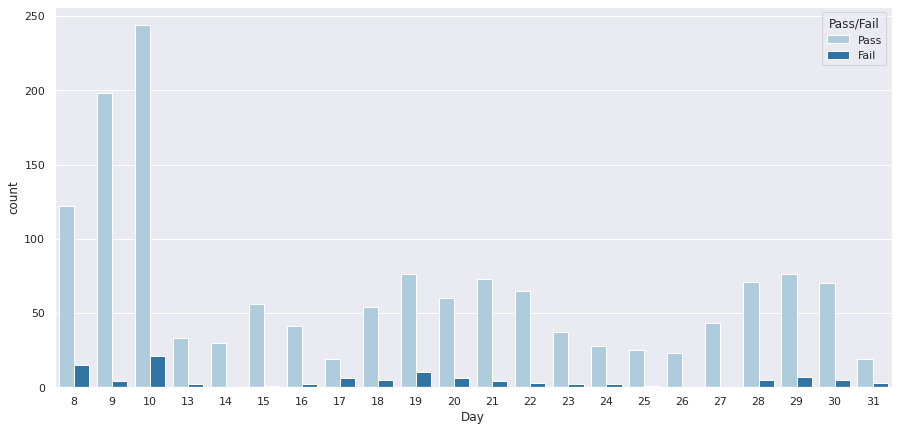

In [ ]:
# [퀴즈] 일 단위에 따른 Pass/Fail 분포 그래프 만들기
# [정답]
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid", palette="Paired")

# 코드

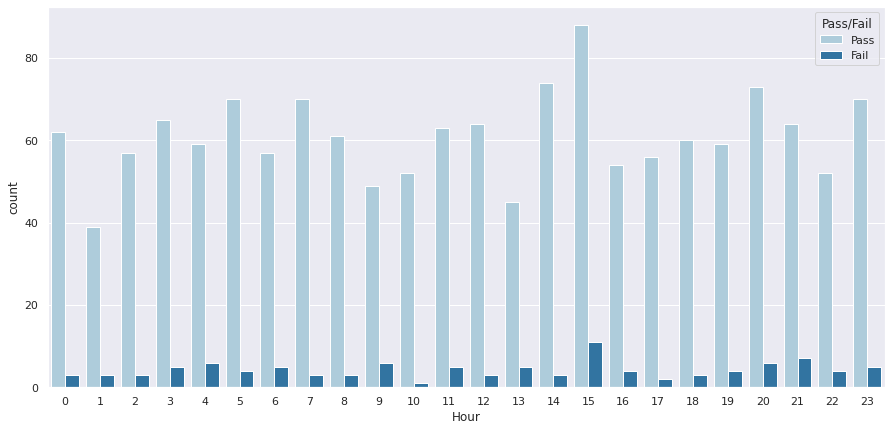

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid", palette="Paired")

# 코드

1년간 월, 일, 시간에 대해서는 Pass/Fail에 큰 영향은 없는 것으로 파악됩니다

다음은 센서 데이터를 통해 공정 결과가 어떻게 달라지는지 확인해보겠습니다

### 3.2 공정 센서 데이터 확인하기
간단하게 시간에 따른 공정 결과에 영향을 미치는 요인은 확인하지 못했습니다

이제 590여 개의 센서 데이터를 분석해서 공정 결과에 영향을 미치는 요인이 있는지 파악해보겠습니다

#### 개별 센서 데이터 확인하기
먼저, 센서 데이터만 선별하여 저장한 뒤, 개별 센서 일부를 선정하여 공정 결과를 확인하겠습니다

In [ ]:
sensor_df = df.loc[:, '0':'Pass/Fail']
sensor_df.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.9300,2564.0000,2187.7333,1411.1265,1.3602,100.0000,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0215,0.0165,0.0053,99.6701,Pass
1,3095.7800,2465.1400,2230.4222,1463.6606,0.8294,100.0000,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,2932.6100,2559.9400,2186.4111,1698.0172,1.5102,100.0000,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,2988.7200,2479.9000,2199.0333,909.7926,1.3204,100.0000,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,3032.2400,2502.8700,2233.3667,1326.5200,1.5334,100.0000,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass


분리된 센서 데이터프레임에서 **gropby().mean()** 을 이용하여 센서별 통계 수치를 확인해보겠습니다

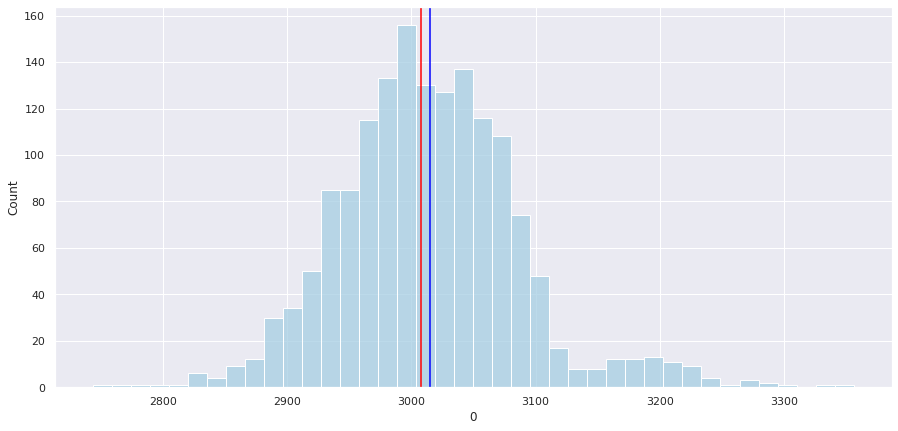

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid", palette="Paired")

# 코드 # 0번 센서의 히스토그램 

# 코드 # 0번 센서의 Pass/Fail 그룹바이.평균 중 Fail
# 코드 # 0번 센서의 Pass/Fail 그룹바이.평균 중 Pass

# 코드 # axvline으로 fail 붉은선 표현
# 코드 # axvline으로 pass 붉은선 표현

0번 센서에 대한 히스토그램입니다 붉은 선은 0번 센서에서 발생한 Fail 제품의 수치들의 평균이며 파란 선은 Pass 제품의 평균 수치입니다

이 그래프로는 유의미한 결과를 도출하지 못한 것 같으니 이번에는 0번 센서의 Pass/Fail 데이터를 나눠 그래프로 그려보겠습니다

In [ ]:
pass_df = df[df['Pass/Fail']=='Pass']
fail_df = df[df['Pass/Fail']=='Fail']

pandas에서도 데이터 시각화 기능을 지원하고 있습니다

이번에는 pandas를 이용하여 히스토그램 그래프를 제작하겠습니다


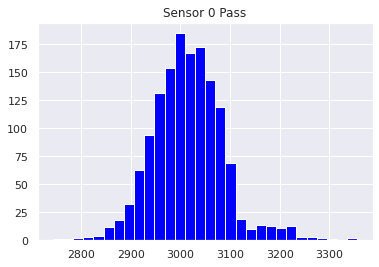

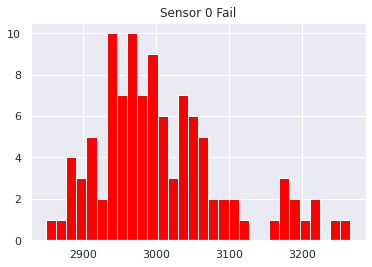

In [ ]:
sensor_id = '0'

# 코드 # 아래 그림을 보고 히스토 그램을 그려보자 (bins=30)
plt.show()
plt.close() 


# 코드 # 아래 그림을 보고 히스토 그램을 그려보자 (bins=30)
plt.show()
plt.close()

이전 그래프와는 달리 0번 센서에서 유의미한 결과를 얻은 것 같습니다 값이 중앙에서부터 고르게 퍼지는 Pass와는 다르게 Fail은 불규칙하게 퍼지는 것을 확인할 수 있습니다

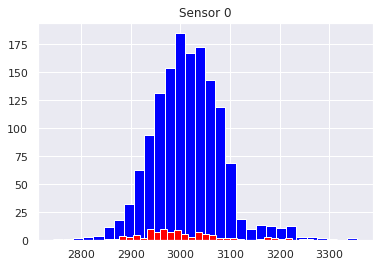

In [ ]:
fig, ax = plt.subplots()

# 코드
# 코드

# 코드
plt.show()
plt.close()

하지만 Pass와 Fail 의 비율을 살펴보면 Pass 가 압도적으로 많은 것을 위의 그래프를 통해  확인할 수 있습니다

이를 위해 숫자의 범위를 맞추는 **정규화** 를 진행하여 하나의 그래프로 확인해보겠습니다

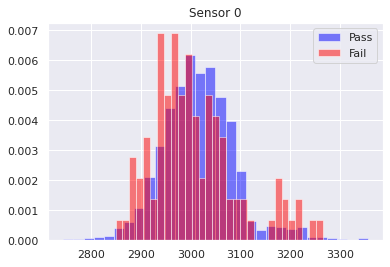

In [ ]:
fig, ax = plt.subplots()

# 코드 # density=True, alpha=0.5
# 코드 # density=True, alpha=0.5

# 코드
# 코드
plt.show()
plt.close()

Pass/Fail 로 구분한 0번 센서를 확인한 결과 Fail 데이터의 분포가 불안정하다는 것을 확인할 수 있었고 x축이 3200인 구간에서 이상치를 확인할 수 있었습니다

이번에는 히스토그램이 아닌 박스플롯이라는 그래프를 이용하여 0번 센서의 데이터를 확인해보겠습니다

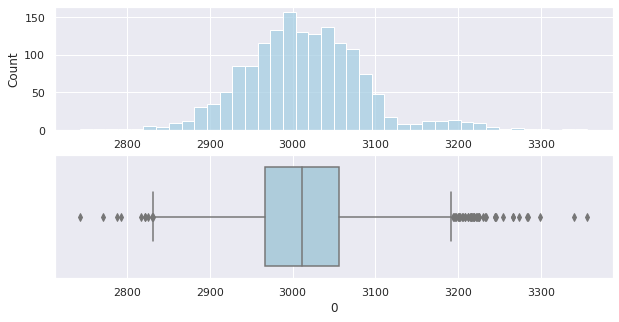

In [ ]:
plt.figure(figsize=(10,5))
# 코드 subplot

# 코드

# 코드 subplot
# 코드

위의 그래프는 앞에서 진행한 0번 센서의 히스토그램이고 아래의 그래프는 같은 데이터를 박스 플롯이라는 그래프로 표현한 것입니다

히스토그램에서는 Pass/Fail을 나눠서야 이상치를 확인할 수 있었지만 박스 플롯을 사용하면 이상치를 쉽게 찾을 수 있습니다

(참고 : 이상치 = 양쪽의 검정색 다이아몬드)

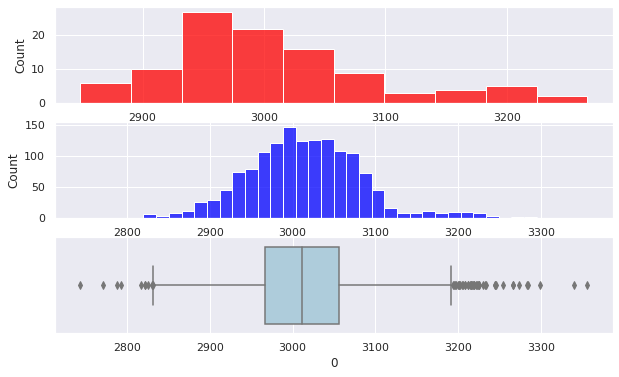

In [ ]:
# [퀴즈] 3행 1열 그래프 만들기 (1행 : 센서 0번의 Fail 히스토그램, 2행 : 센서 0번의 Pass 히스토그램, 3행 : 0번 센서의 박스플롯)

여러 히스토그램을 통해 다양한 데이터를 한 눈에 확인할 수 있었지만 여러개를 만들면 번거로운 점이 있습니다

그래서 이번에는 박스플롯을 제외한 히스토그램들을 한 번에 확인해보겠습니다

지금까지 0번 센서를 확인했다면 이번에는 1번 센서를 통해 확인해보겠습니다

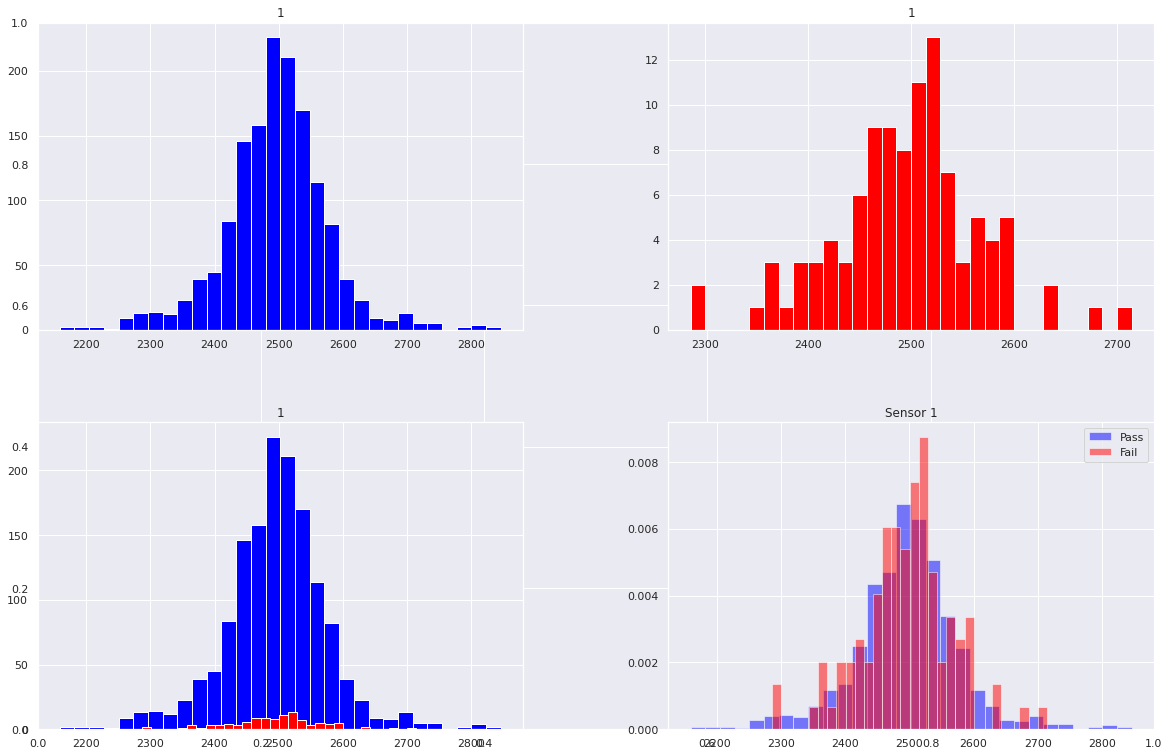

In [ ]:
fig, ax = plt.subplots(figsize=(20, 13))

ax1 = # 코드
ax2 = # 코드
ax3 = # 코드
ax4 = # 코드

sensor_id = '1'
sensor_id = str(sensor_id)

# 코드

# 코드

# 코드

pass_df[[sensor_id]].hist(bins=30, ax=ax4, density=True, alpha=0.5, label='Pass', color='blue')
fail_df[[sensor_id]].hist(bins=30, ax=ax4, density=True, alpha=0.5, label='Fail', color='red')
plt.title('Sensor {}'.format(sensor_id))
plt.legend()

앞에서는 하나의 박스플롯을 봤습니다 하지만 설정만 다음 예시처럼 Pass 와 Fail 나눠서 각각의 박스플롯을 확인할 수 있습니다

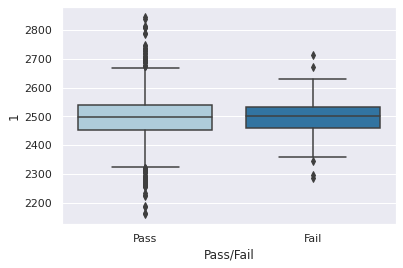

In [ ]:
# 코드

# 참고 - 경로 연결

구글 코랩 환경에서는 로그인되어 있는 구글 계정과 연결되어 있는 '구글 드라이브'와의 연동을 지원합니다.  
연동하는 경우, 자신의 구글 드라이브를 로컬 환경처럼 활용이 가능하며, 원하는 파일이나 이미지를 불러올 수 있습니다.

In [ ]:
### Google Drive 패키지와 os 모듈 불러오기

from google.colab import drive
import os

In [ ]:
### 본인 구글 드라이브의 최초 경로를 설정하기

# 대부분의 구글 드라이브 최초 경로는 아래와 같습니다. 
# 예외 발생 시 본인의 구글 드라이브에 접속하여 content 폴더나 gdrive 폴더가 어떤 위치에 있으며, 
# 자신이 연결하려는 폴더까지의 경로가 어떻게 되는지 확인해야 합니다.  
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


<img src = "https://1.bp.blogspot.com/-UdgK4XrzJ6k/XoRD6CTlL-I/AAAAAAAAAQY/GptZSn3vxHwoTGE0mOpaJVJWLRQYZdaeQCLcBGAsYHQ/s1600/%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258F%25E1%2585%25B3%25E1%2584%2585%25E1%2585%25B5%25E1%2586%25AB%25E1%2584%2589%25E1%2585%25A3%25E1%2586%25BA%2B2020-04-01%2B%25E1%2584%258B%25E1%2585%25A9%25E1%2584%2592%25E1%2585%25AE%2B4.29.05.png" width = "800" >


In [ ]:
### 자신의 현재 경로를 파악하기

os.getcwd() ## 아마도 /content로 나올 것.

'/content'

In [ ]:
### 현재 작업 환경 설정하기 (자신만의 작업 디렉토리를 기본 경로로 설정하는 것)

#.ipynb 노트북 파일과 불러오려는 이미지 및 모듈에 해당하는 파일들은 같은 현재 작업 환경 
#또는 그 하위 폴더에 존재하는 것이 좋습니다. 

# 자신만의 기본 경로를 설정하는데, 대부분의 경우에는 Colab Notebooks까지 동일하게 공유하며,
# 이후 경로는 자신이 생성한 폴더에 맞추어서 경로를 설정하면 됩니다.
gdrive_dir = '/content/gdrive/MyDrive/Colab Notebooks/data'
os.chdir(gdrive_dir)

In [ ]:
### 자신의 현재 경로를 파악하기
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/data'

In [ ]:
os.listdir(os.getcwd())

['iphone.csv',
 'korean-idol.csv',
 'korean-idol.xlsx',
 'gender_submission.csv',
 'test.csv',
 'train.csv',
 'station.txt',
 'cats_and_dogs_filtered']

# 참고 - 경로 연결 예시

## 1.1 Downloading a dataset

**NOTE:** 원래 Dogs vs Cats 데이터셋은 25,000장으로 이루어져 있지만, 실습을 위해 2,000장으로 이루어진 데이터를 사용합니다.

 [Dogs vs Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-12-01 07:07:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2021-12-01 07:07:45 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## 1.2 Unzip & Set the path

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(gdrive_dir)               # gdrive_dir에 zipfile을 압축해제

- 경로설정

In [ ]:
base_dir = os.path.join(gdrive_dir, 'cats_and_dogs_filtered')
print(f'base_dir: {base_dir}')

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
print(f'train_dir: {train_dir}')
print(f'valid_dir: {valid_dir}')

# Train set path
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# valid set path
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

print(f'train_cats_dir: {train_cats_dir}')
print(f'train_dogs_dir: {train_dogs_dir}')
print(f'valid_cats_dir: {valid_cats_dir}')
print(f'valid_dogs_dir: {valid_dogs_dir}')

base_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered
train_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/train
valid_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/validation
train_cats_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/train/cats
train_dogs_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/train/dogs
valid_cats_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/validation/cats
valid_dogs_dir: /content/gdrive/MyDrive/Colab Notebooks/data/cats_and_dogs_filtered/validation/dogs


## 1.3 데이터 이름 및 개수 확인

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(f'train_cat_files: {train_cat_fnames[:10]}')

train_dog_fnames = os.listdir(train_dogs_dir)
print(f'train_dog_files: {train_dog_fnames[:10]}')

train_cat_files: ['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
train_dog_files: ['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


In [ ]:
train_cat_fnames.sort()
train_dog_fnames.sort()
print(f'train_cat_files: {train_cat_fnames[:10]}')
print(f'train_dog_files: {train_dog_fnames[:10]}')

train_cat_files: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
train_dog_files: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total valid cat images:', len(os.listdir(valid_cats_dir)))
print('total valid dog images:', len(os.listdir(valid_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total valid cat images: 500
total valid dog images: 500


## 1.4 Image dataset 들여다보기

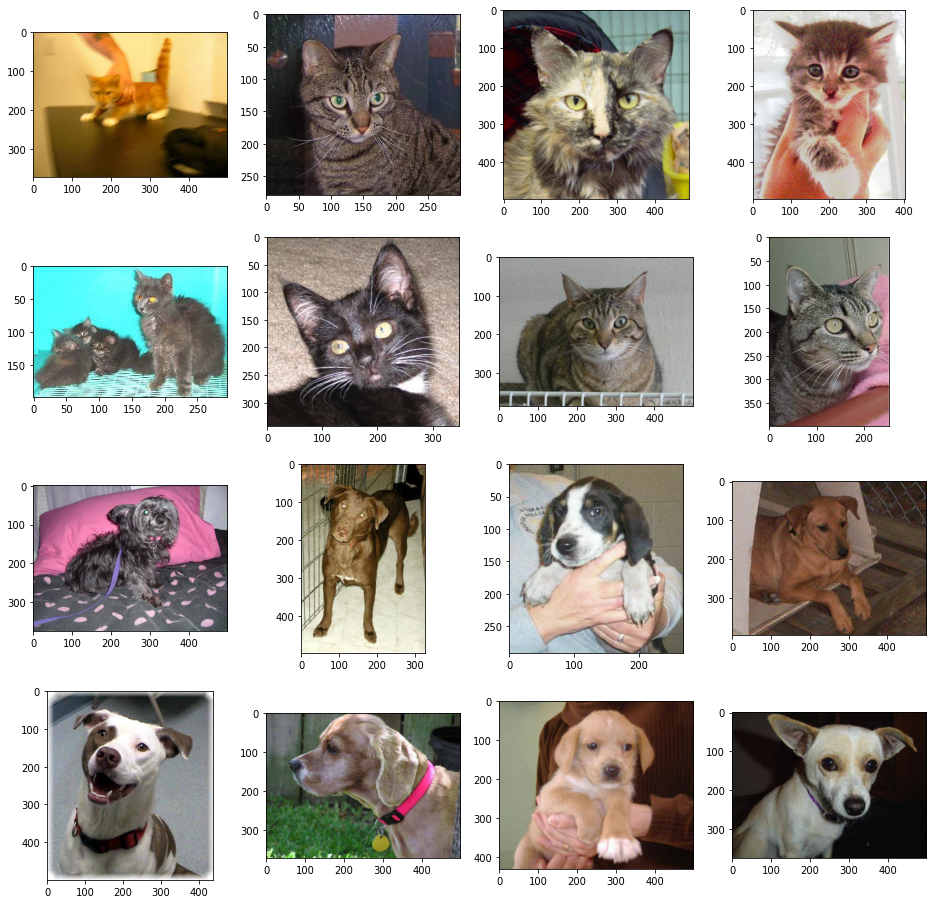

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4x4 figures
nrows = 4
ncols = 4

# 여러 사진을 한번에 그리기 위해 gcf사용
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# 8장씩 
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[:8]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[:8]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # subplot을 통해 4,4 좌표에 차례대로 그림을 불러온다.
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## 1.1 Downloading a dataset (실습)



**NOTE:** 원래 Dogs vs Cats 데이터셋은 25,000장으로 이루어져 있지만, 실습을 위해 2,000장으로 이루어진 데이터를 사용합니다.

 [Dogs vs Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-11-25 08:01:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   137MB/s    in 0.5s    

2022-11-25 08:01:30 (137 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## 1.2 Unzip & Set the path  (실습)

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    # 코드작성              # gdrive_dir에 zipfile을 압축해제

- 경로설정

In [ ]:
# 코드작성
print(f'base_dir: {base_dir}')

# 코드작성
# 코드작성
print(f'train_dir: {train_dir}')
print(f'valid_dir: {valid_dir}')

# Train set path
# 코드작성
# 코드작성

# valid set path
# 코드작성
# 코드작성

# 코드작성
# 코드작성
# 코드작성
# 코드작성

base_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered
train_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/train
valid_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/validation
train_cats_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/train/cats
train_dogs_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/train/dogs
valid_cats_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/validation/cats
valid_dogs_dir: /content/gdrive/My Drive/Colab Notebooks/ICT2/cats_and_dogs_filtered/validation/dogs


## 1.3 데이터 이름 및 개수 확인  (실습)

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(f'train_cat_files: {train_cat_fnames[:10]}')

# 코드작성
# 코드작성

train_cat_files: ['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
train_dog_files: ['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


In [ ]:
# 코드작성
# 코드작성
# 코드작성
# 코드작성

train_cat_files: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
train_dog_files: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
# 코드작성
# 코드작성
# 코드작성

total training cat images: 1000
total training dog images: 1000
total valid cat images: 500
total valid dog images: 500


## 1.4 Image dataset 들여다보기  (실습)

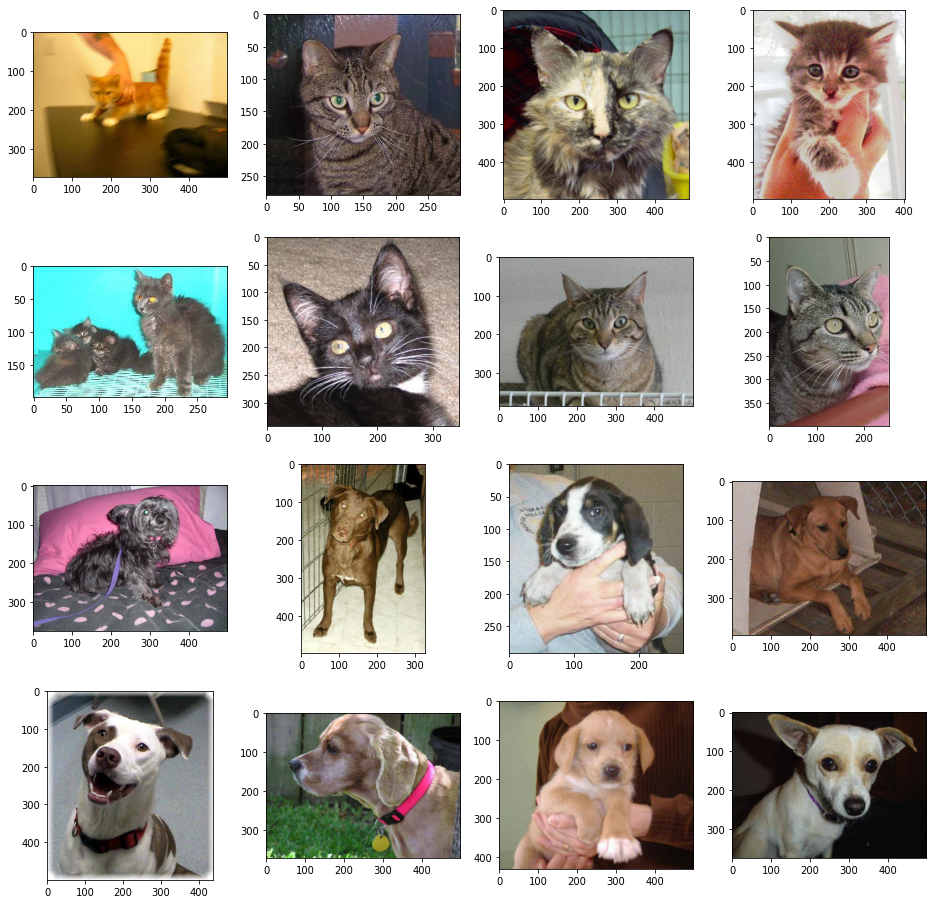

In [ ]:
%matplotlib inline
# 코드작성
import matplotlib.image as mpimg

# 4x4 figures
nrows = 4
ncols = 4

# 여러 사진을 한번에 그리기 위해 gcf사용, 사이즈 조정 (ncols * 4, nrows * 4)
# 코드작성
# 코드작성

# 8장씩 
# 코드작성
# 코드작성

# 코드작성
  # subplot을 통해 4,4 좌표에 차례대로 그림을 불러온다.
  # 코드작성
  img = mpimg.imread(img_path)
  # 코드작성

plt.show()
